In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2022-12-10 20:56:06.449443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 20:56:06.537753: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-10 20:56:06.540158: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-10 20:56:06.540169: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2022-12-10 20:56:11.423042: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-10 20:56:11.423067: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-10 20:56:11.423080: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akshay-Mi-NoteBook-Ultra): /proc/driver/nvidia/version does not exist
2022-12-10 20:56:11.423316: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 [>.............................] - ETA: 9s - loss: 1.5160 - accuracy: 0.3672
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 1s 6ms/step - loss: 1.4626 - accuracy: 0.3519 - val_loss: 1.3721 - val_accuracy: 0.3864
Epoch 2/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.4364 - accuracy: 0.3438
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.3627 - accuracy: 0.3918 - val_loss: 1.2883 - val_accuracy: 0.4115
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.3026 - accuracy: 0.4297
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 1.2998 - accuracy: 0.4268 - val_loss: 1.2160 - val_accuracy: 0.5053
Epoch 4/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.2780 - accuracy: 0.4141
E

 1/29 [>.............................] - ETA: 0s - loss: 0.7565 - accuracy: 0.6797
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.7551 - accuracy: 0.6933 - val_loss: 0.4677 - val_accuracy: 0.8901
Epoch 29/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7605 - accuracy: 0.7109
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.7805 - accuracy: 0.6931 - val_loss: 0.4634 - val_accuracy: 0.8909
Epoch 30/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.9528 - accuracy: 0.6094
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.7457 - accuracy: 0.7092 - val_loss: 0.4530 - val_accuracy: 0.8949
Epoch 31/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7251 - accuracy: 0.7422
Epoch 31

 1/29 [>.............................] - ETA: 0s - loss: 0.7219 - accuracy: 0.7344
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7475 - val_loss: 0.3520 - val_accuracy: 0.9127
Epoch 56/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6118 - accuracy: 0.7344
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7454 - val_loss: 0.3514 - val_accuracy: 0.9127
Epoch 57/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4628 - accuracy: 0.8359
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.7529 - val_loss: 0.3454 - val_accuracy: 0.9143
Epoch 58/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6899 - accuracy: 0.6875
Epoch 58

 1/29 [>.............................] - ETA: 0s - loss: 0.5444 - accuracy: 0.7969
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7731 - val_loss: 0.3191 - val_accuracy: 0.9264
Epoch 83/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6519 - accuracy: 0.7656
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7710 - val_loss: 0.3157 - val_accuracy: 0.9281
Epoch 84/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5461 - accuracy: 0.7969
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.7688 - val_loss: 0.3202 - val_accuracy: 0.9289
Epoch 85/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6002 - accuracy: 0.7812
Epoch 85

 1/29 [>.............................] - ETA: 0s - loss: 0.5484 - accuracy: 0.8047
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7831 - val_loss: 0.3018 - val_accuracy: 0.9410
Epoch 110/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7858 - accuracy: 0.6953
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.7895 - val_loss: 0.3050 - val_accuracy: 0.9410
Epoch 111/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6444 - accuracy: 0.7969
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7788 - val_loss: 0.3002 - val_accuracy: 0.9450
Epoch 112/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4806 - accuracy: 0.8125
Ep

Epoch 136/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.3948 - accuracy: 0.8906
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7992 - val_loss: 0.2947 - val_accuracy: 0.9507
Epoch 137/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8125
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7798 - val_loss: 0.2923 - val_accuracy: 0.9531
Epoch 138/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4816 - accuracy: 0.8359
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7868 - val_loss: 0.3024 - val_accuracy: 0.9418
Epoch 139/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5716 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 812us/step - loss: 0.3002 - accuracy: 0.9386


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 46ms/step
[9.8118424e-01 1.8603284e-02 1.3360975e-04 6.7474262e-05 1.1509772e-05]
0


# Confusion matrix

39/39 [==============================] - 0s 740us/step


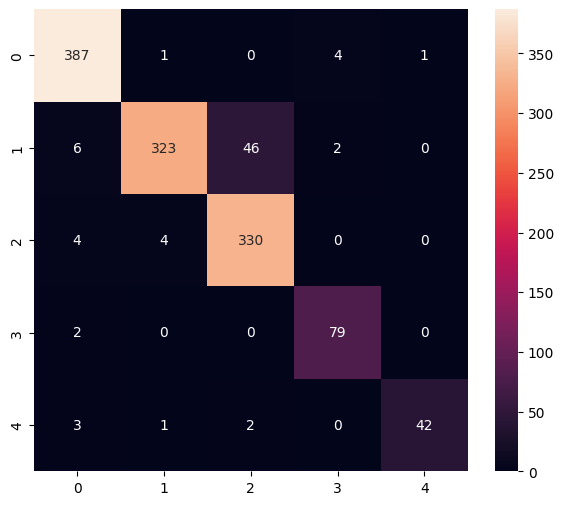

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       393
           1       0.98      0.86      0.92       377
           2       0.87      0.98      0.92       338
           3       0.93      0.98      0.95        81
           4       0.98      0.88      0.92        48

    accuracy                           0.94      1237
   macro avg       0.94      0.93      0.94      1237
weighted avg       0.94      0.94      0.94      1237



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp6tvy_93b/assets


INFO:tensorflow:Assets written to: /tmp/tmp6tvy_93b/assets
2022-12-10 20:56:38.226468: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-10 20:56:38.226495: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-10 20:56:38.226906: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp6tvy_93b
2022-12-10 20:56:38.227800: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-10 20:56:38.227818: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp6tvy_93b
2022-12-10 20:56:38.230469: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-10 20:56:38.231147: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-10 20:56:38.256963: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

6588

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 189 µs, sys: 23 µs, total: 212 µs
Wall time: 133 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8118424e-01 1.8603288e-02 1.3360973e-04 6.7474255e-05 1.1509772e-05]
0
